Import Libraries and Raw Data

In [204]:
import pandas as pd
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod
import sklearn.linear_model as sklinmod
import sklearn.svm as sksvm
import sklearn.metrics as skmet
import sklearn.cluster as skclus
import seaborn as sns
import numpy as np
penguins = pd.read_csv('penguins_lter.csv')

penguins.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Drop useless columns

In [205]:
penguins.drop(['studyName','Comments','Region','Sample Number','Stage','Individual ID','Date Egg','Island','Clutch Completion'],axis=1,inplace=True)
penguins.shape
# get rid of weird dot thing
penguins.Sex.replace('.',None,inplace=True)
penguins.dropna(axis=0,inplace=True)
penguins.shape


(325, 8)

Inspect

In [206]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Culmen Length (mm)   325 non-null    float64
 2   Culmen Depth (mm)    325 non-null    float64
 3   Flipper Length (mm)  325 non-null    float64
 4   Body Mass (g)        325 non-null    float64
 5   Sex                  325 non-null    object 
 6   Delta 15 N (o/oo)    325 non-null    float64
 7   Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.3+ KB


Split Training Data for Predicting Species and then apply get dummies to Sex and Clutch Completion columns

In [207]:
# training stuff for classifying species
y = penguins.Species
X = penguins.drop(['Species','Sex'],axis=1)
X_train, X_test, y_train, y_test = skmod.train_test_split(X,y,test_size=.25,random_state=26)

cul_length = X_test['Culmen Length (mm)']
flip_length = X_test['Flipper Length (mm)']
cul_depth = X_test['Culmen Depth (mm)']

In [208]:
# map species names to numbers
namemap = {}
specnamelist = penguins.Species.unique()
for i in range(len(specnamelist)):
    namemap[specnamelist[i]] = i+1
namemap['Chinstrap penguin (Pygoscelis antarctica)'] = 3
namemap['Gentoo penguin (Pygoscelis papua)'] = 2

namemap
y_train = y_train.replace(namemap)
y_test = y_test.replace(namemap)

Normalize Data

In [209]:
# make dummy variables
X_train.info()
X_train = skpre.scale(X_train)
X_test = skpre.scale(X_test)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 294 to 327
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   243 non-null    float64
 1   Culmen Depth (mm)    243 non-null    float64
 2   Flipper Length (mm)  243 non-null    float64
 3   Body Mass (g)        243 non-null    float64
 4   Delta 15 N (o/oo)    243 non-null    float64
 5   Delta 13 C (o/oo)    243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


Now Run Models to Classify Species

In [210]:
# SVM RBF Kernel
mod = sksvm.SVC(kernel='rbf')
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)


y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

[[36  0  0]
 [ 0 31  0]
 [ 0  0 15]]
1.0


In [211]:
# SVM Linear Kernel
mod = sksvm.SVC(kernel='linear')
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)

print(f'Coefficients: {mod.coef_}')
y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

Coefficients: [[-0.41167741  0.7685999  -0.73592739 -0.32395651  0.22783804  0.20308487]
 [-2.04784817  0.99005532  0.10736572  0.87639111  0.00205637 -1.03148563]
 [-0.02616785 -0.41838272  0.35522016  0.35290814 -0.49629906 -0.23101401]]
[[36  0  0]
 [ 0 31  0]
 [ 0  0 15]]
1.0


In [212]:
# Logistic Regression Classifier
mod = sklinmod.LogisticRegressionCV()
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)

print(f'Coefficients: {mod.coef_}')
y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

Coefficients: [[-1.45798653  1.01205066 -0.59156123  0.01606663  0.14726828 -0.69549435]
 [ 0.30378952 -0.93865723  0.79565663  0.66753676 -0.58562674 -0.39108243]
 [ 1.15419701 -0.07339343 -0.2040954  -0.68360339  0.43835846  1.08657678]]
[[36  0  0]
 [ 0 31  0]
 [ 0  0 15]]
1.0


Compare to K-Means

In [213]:
k3 = skclus.KMeans(n_clusters=3,random_state=0).fit_predict(X_test)

print(y_pred - (k3+1))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


Plot Scatter Groupings

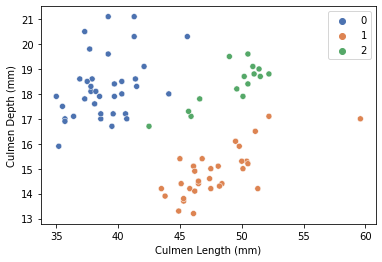

In [214]:
# choose two columns to plot for scatterplot


# attempt plotting
scatter = sns.scatterplot(x=cul_length, y=cul_depth,hue=k3,palette='deep')